# **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# **Load & prepare CSV file**


In [2]:

# Load the dataset (adjust the path if needed)
df = pd.read_csv("spam.csv", encoding="latin-1")

# Keep only the relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Display the first 5 rows
print(df.head())

# Show class distribution (how many spam and ham)
print(df['label'].value_counts())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
ham     4825
spam     747
Name: label, dtype: int64


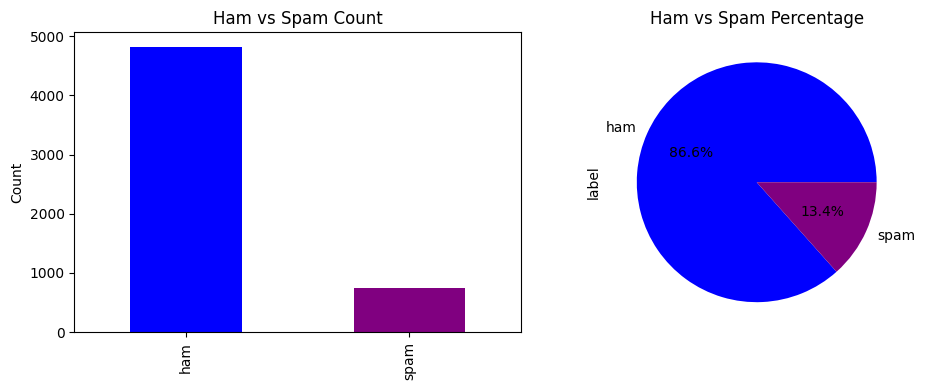

In [3]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='bar', color=['blue', 'purple'])
plt.title('Ham vs Spam Count')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'purple'])
plt.title('Ham vs Spam Percentage')

plt.tight_layout()
plt.show()

# **Encode the labels and vectorize the text**

In [4]:


# Convert labels: ham → 0, spam → 1
label_encoder = LabelEncoder()
df['label_num'] = label_encoder.fit_transform(df['label'])  # ham=0, spam=1

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])  # Features
y = df['label_num']  # Labels

# **Split into training and test data**

In [5]:

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **Split into training and test data**


---



In [6]:

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train Logistic Regression model**


In [7]:

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


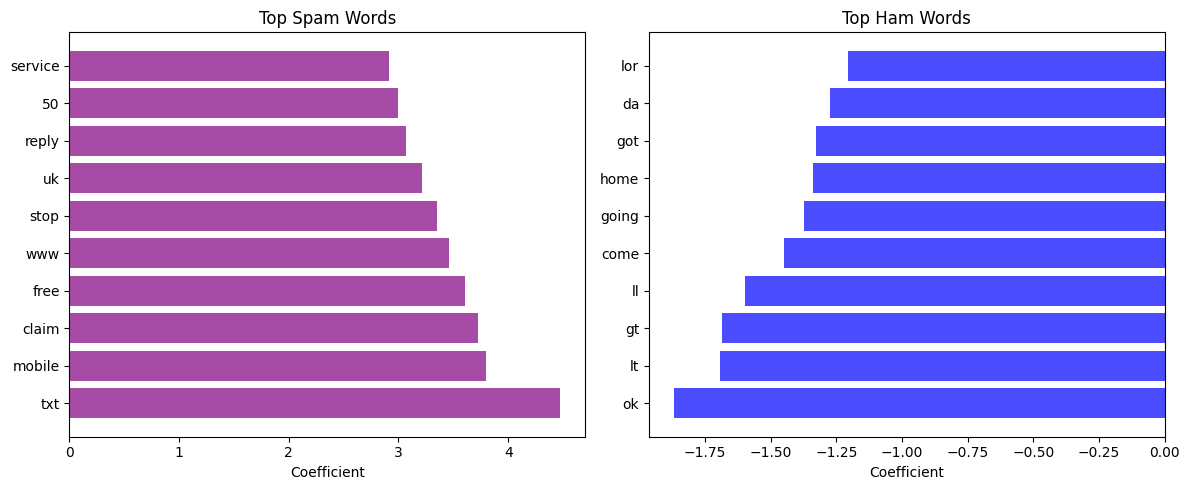

In [9]:
# Get top 10 spam and ham words
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Top spam words
top_spam = coefficients.argsort()[-10:][::-1]
spam_words = [feature_names[i] for i in top_spam]
spam_scores = [coefficients[i] for i in top_spam]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.barh(spam_words, spam_scores, color='purple', alpha=0.7)
plt.title('Top Spam Words')
plt.xlabel('Coefficient')

# Top ham words
top_ham = coefficients.argsort()[:10]
ham_words = [feature_names[i] for i in top_ham]
ham_scores = [coefficients[i] for i in top_ham]

plt.subplot(1, 2, 2)
plt.barh(ham_words, ham_scores, color='blue', alpha=0.7)
plt.title('Top Ham Words')
plt.xlabel('Coefficient')

plt.tight_layout()
plt.show()

# **Evaluate the model**

In [10]:

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Accuracy: How many predictions are correct overall?
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy, 3))

# Precision: Of all messages predicted as spam, how many were actually spam?
precision = precision_score(y_test, y_pred)
print("📏 Precision (How precise when saying 'spam'):", round(precision, 3))

# Recall: Of all actual spam messages, how many did we correctly detect?
recall = recall_score(y_test, y_pred)
print("🔍 Recall (How well we catch actual spam):", round(recall, 3))

# F1 Score: Balance between precision and recall
f1 = f1_score(y_test, y_pred)
print("⚖️ F1 Score (Balance of precision and recall):", round(f1, 3))

# Optional: Full detailed report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))



✅ Accuracy: 0.944
📏 Precision (How precise when saying 'spam'): 0.968
🔍 Recall (How well we catch actual spam): 0.607
⚖️ F1 Score (Balance of precision and recall): 0.746

📋 Classification Report:

              precision    recall  f1-score   support

         Ham       0.94      1.00      0.97       965
        Spam       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



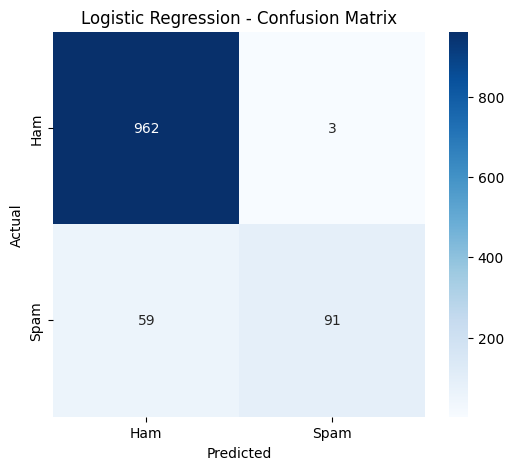

📊 Logistic Regression Results:
   ✅ True Negatives (Ham correctly identified): 962
   ❌ False Positives (Ham wrongly labeled as Spam): 3
   ❌ False Negatives (Spam missed): 59
   ✅ True Positives (Spam correctly caught): 91


In [ ]:
cm_lr = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Ham', 'Spam'], 
           yticklabels=['Ham', 'Spam'])
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print interpretation
tn, fp, fn, tp = cm_lr.ravel()
print(f" Logistic Regression Results:")
print(f"    True Negatives (Ham correctly identified): {tn}")
print(f"    False Positives (Ham wrongly labeled as Spam): {fp}")
print(f"    False Negatives (Spam missed): {fn}")
print(f"    True Positives (Spam correctly caught): {tp}")

# **Create the k-NN model**

🔍 Finding the best k value for k-NN


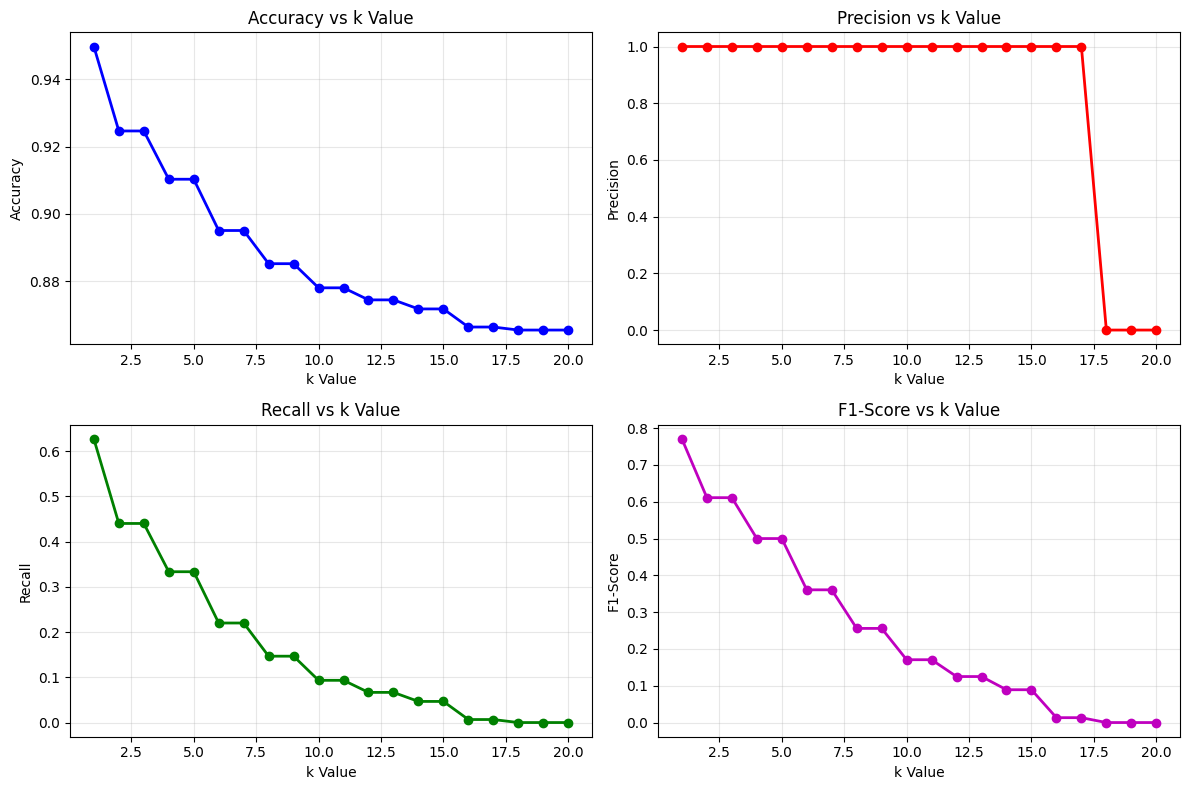

📊 Best k value: 1 (F1-Score: 0.770)


In [12]:
print("🔍 Finding the best k value for k-NN")

# Test different k values
k_values = range(1, 21)  # Test k from 1 to 20
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for k in k_values:
    # Train k-NN with different k values
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_temp = knn_temp.predict(X_test)
    
    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred_temp))
    precision_scores.append(precision_score(y_test, y_pred_temp, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred_temp, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_temp, zero_division=0))

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(k_values, accuracy_scores, 'bo-', linewidth=2, markersize=6)
plt.title('Accuracy vs k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(k_values, precision_scores, 'ro-', linewidth=2, markersize=6)
plt.title('Precision vs k Value')
plt.xlabel('k Value')
plt.ylabel('Precision')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(k_values, recall_scores, 'go-', linewidth=2, markersize=6)
plt.title('Recall vs k Value')
plt.xlabel('k Value')
plt.ylabel('Recall')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.plot(k_values, f1_scores, 'mo-', linewidth=2, markersize=6)
plt.title('F1-Score vs k Value')
plt.xlabel('k Value')
plt.ylabel('F1-Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find and print the best k value
best_k_idx = f1_scores.index(max(f1_scores))
best_k = k_values[best_k_idx]
print(f"📊 Best k value: {best_k} (F1-Score: {max(f1_scores):.3f})")

In [13]:

# Create the k-NN model with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# **Train the k-NN model**

In [14]:
# Train the k-NN model on the same training data as Logistic Regression
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# **Make predictions on the test data**


In [15]:
# Predict the test labels using k-NN
y_pred_knn = knn.predict(X_test)

# **Evaluate the k-NN model**



In [16]:

# Evaluate k-NN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the results
print("📊 Evaluation of k-Nearest Neighbors (k=5):\n")
print("✅ Accuracy:", round(accuracy_knn, 3))
print("📏 Precision:", round(precision_knn, 3))
print("🔍 Recall:", round(recall_knn, 3))
print("⚖️ F1 Score:", round(f1_knn, 3))

# Detailed classification report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred_knn, target_names=["Ham", "Spam"]))

📊 Evaluation of k-Nearest Neighbors (k=5):

✅ Accuracy: 0.91
📏 Precision: 1.0
🔍 Recall: 0.333
⚖️ F1 Score: 0.5

📋 Classification Report:

              precision    recall  f1-score   support

         Ham       0.91      1.00      0.95       965
        Spam       1.00      0.33      0.50       150

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg       0.92      0.91      0.89      1115



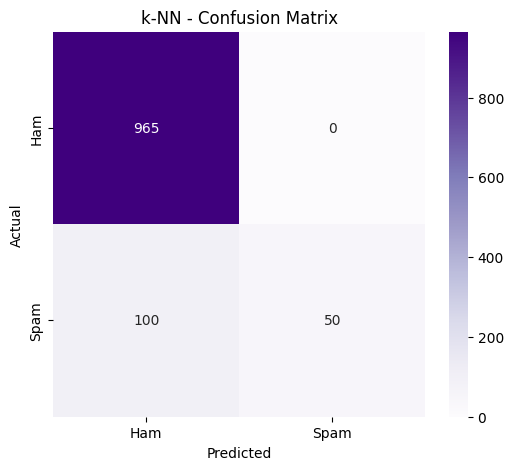

📊 k-NN Results:
   ✅ True Negatives (Ham correctly identified): 965
   ❌ False Positives (Ham wrongly labeled as Spam): 0
   ❌ False Negatives (Spam missed): 100
   ✅ True Positives (Spam correctly caught): 50


In [18]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', 
           xticklabels=['Ham', 'Spam'], 
           yticklabels=['Ham', 'Spam'])
plt.title('k-NN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print interpretation
tn_knn, fp_knn, fn_knn, tp_knn = cm_knn.ravel()
print(f"📊 k-NN Results:")
print(f"   ✅ True Negatives (Ham correctly identified): {tn_knn}")
print(f"   ❌ False Positives (Ham wrongly labeled as Spam): {fp_knn}")
print(f"   ❌ False Negatives (Spam missed): {fn_knn}")
print(f"   ✅ True Positives (Spam correctly caught): {tp_knn}")

## Evaluation Metrics

For this project, I will use the following metrics:

- **Accuracy:** Measures the overall percentage of correctly classified emails (both spam and non-spam).  
- **Precision:** Indicates how many of the emails predicted as spam are actually spam. Important to minimize false alarms.  
- **Recall:** Shows how many of the actual spam emails were correctly detected by the model. Important to catch as much spam as possible.  
- **F1-Score:** The harmonic mean of precision and recall, providing a balanced measure of the model’s performance—especially useful when dealing with imbalanced data.

These metrics together give a comprehensive evaluation of the model, helping to find the best trade-off between detecting spam and avoiding false positives.




📋 k-NN Detailed Analysis


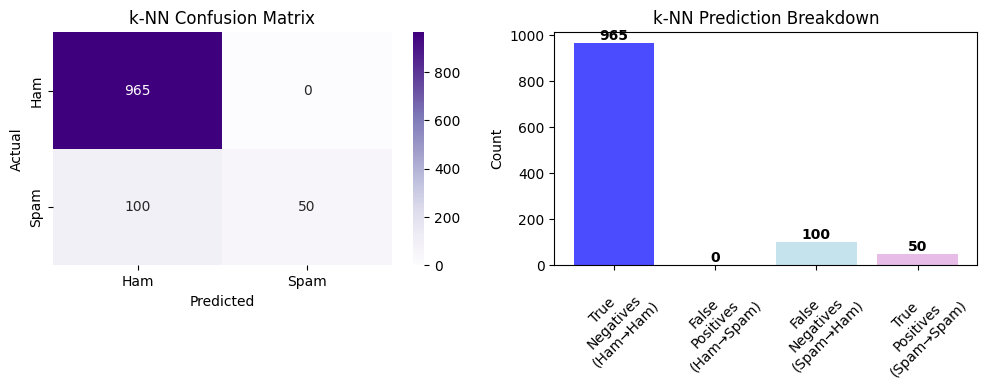


📊 k-NN Performance Analysis:
   ✅ Correctly identified 965 ham messages
   ✅ Correctly identified 50 spam messages
   ❌ Misclassified 0 ham as spam (False Alarms)
   ❌ Missed 100 spam messages (Dangerous!)


In [22]:
print("\n📋 k-NN Detailed Analysis")

from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 4))

# Confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', 
           xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('k-NN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Performance breakdown
tn, fp, fn, tp = cm_knn.ravel()
categories = ['True\nNegatives\n(Ham→Ham)', 'False\nPositives\n(Ham→Spam)', 
              'False\nNegatives\n(Spam→Ham)', 'True\nPositives\n(Spam→Spam)']
values = [tn, fp, fn, tp]
colors = ['blue', 'purple', 'lightblue', 'plum']

plt.subplot(1, 2, 2)
bars = plt.bar(categories, values, color=colors, alpha=0.7)
plt.title('k-NN Prediction Breakdown')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add value labels
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print analysis
print(f"\n📊 k-NN Performance Analysis:")
print(f"   ✅ Correctly identified {tn} ham messages")
print(f"   ✅ Correctly identified {tp} spam messages") 
print(f"   ❌ Misclassified {fp} ham as spam (False Alarms)")
print(f"   ❌ Missed {fn} spam messages (Dangerous!)")

# **Find the most common class in training labels**

In [23]:
# Find the most frequent class in the training set
most_common_class = Counter(y_train).most_common(1)[0][0]
print("Most common class in training data:", most_common_class)

Most common class in training data: 0


# **Predict the most common class for all test samples**

In [24]:
# Predict the most common class for all test samples
y_pred_baseline = np.full_like(y_test, fill_value=most_common_class)

# **Evaluate the baseline model**

In [25]:
print("Baseline Model: Most Common Class Predictor\n")
print(classification_report(y_test, y_pred_baseline, target_names=["Ham", "Spam"]))

Baseline Model: Most Common Class Predictor

              precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       965
        Spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



C:\Users\39377\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\39377\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\39377\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [26]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"--- {model_name} ---")
    print(f"Accuracy:  {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"F1 Score:  {f1:.3f}")
    print()
    return {"Model": model_name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1": f1}
results = []

# Logistic Regression (mit Standard Threshold 0.5 oder deinem eigenen)
results.append(evaluate_model(y_test, y_pred, "Logistic Regression"))

# k-NN
results.append(evaluate_model(y_test, y_pred_knn, "k-Nearest Neighbors"))

# Most Common Class Baseline
results.append(evaluate_model(y_test, y_pred_baseline, "Most Common Class"))
df_results = pd.DataFrame(results)
display(df_results)

--- Logistic Regression ---
Accuracy:  0.944
Precision: 0.968
Recall:    0.607
F1 Score:  0.746

--- k-Nearest Neighbors ---
Accuracy:  0.910
Precision: 1.000
Recall:    0.333
F1 Score:  0.500

--- Most Common Class ---
Accuracy:  0.865
Precision: 0.000
Recall:    0.000
F1 Score:  0.000



C:\Users\39377\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.944395,0.968085,0.606667,0.745902
1,k-Nearest Neighbors,0.910314,1.000000,0.333333,0.500000
2,Most Common Class,0.865471,0.000000,0.000000,0.000000


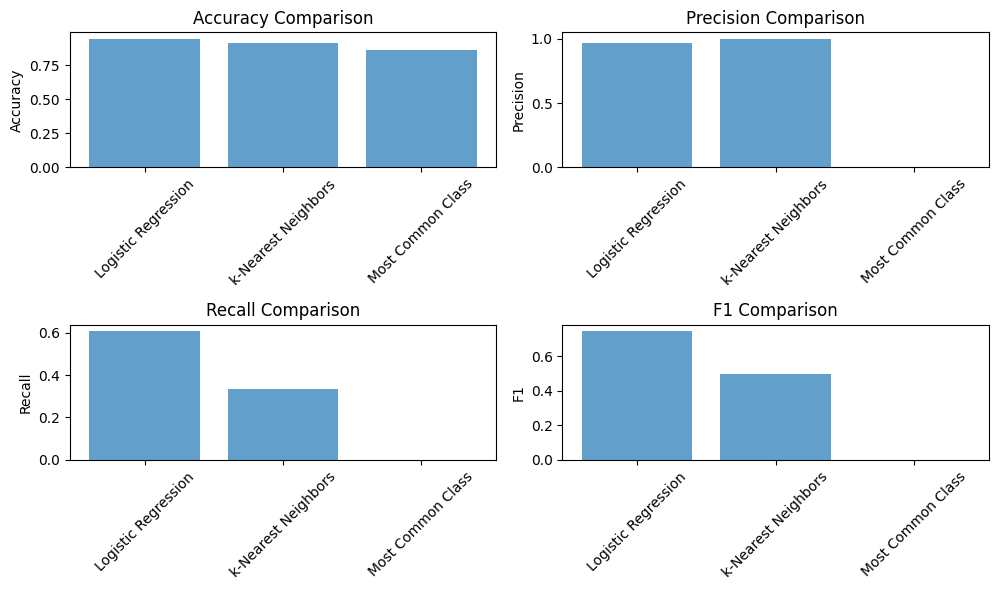

In [27]:
plt.figure(figsize=(10, 6))

# Plot each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
x_pos = range(len(df_results))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.bar(df_results['Model'], df_results[metric], alpha=0.7)
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

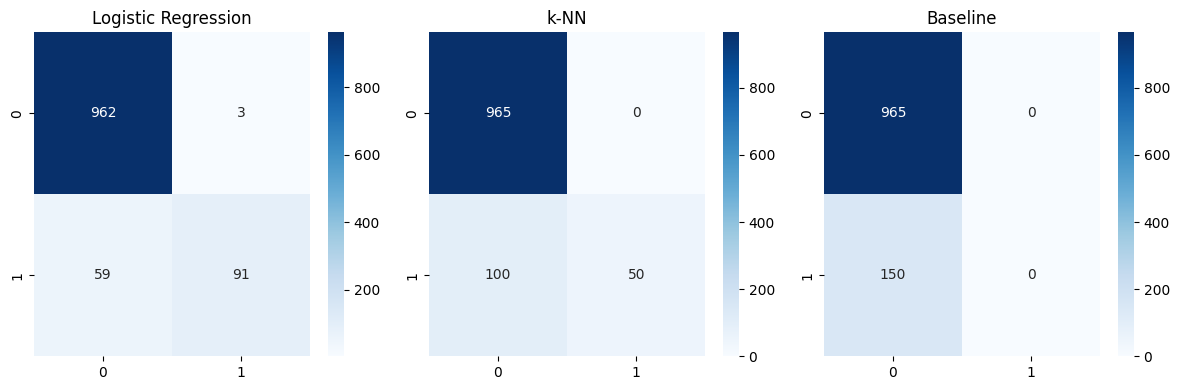

In [28]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 4))

# Logistic Regression
plt.subplot(1, 3, 1)
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression')

# k-NN
plt.subplot(1, 3, 2)
cm2 = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('k-NN')

# Baseline
plt.subplot(1, 3, 3)
cm3 = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.title('Baseline')

plt.tight_layout()
plt.show()

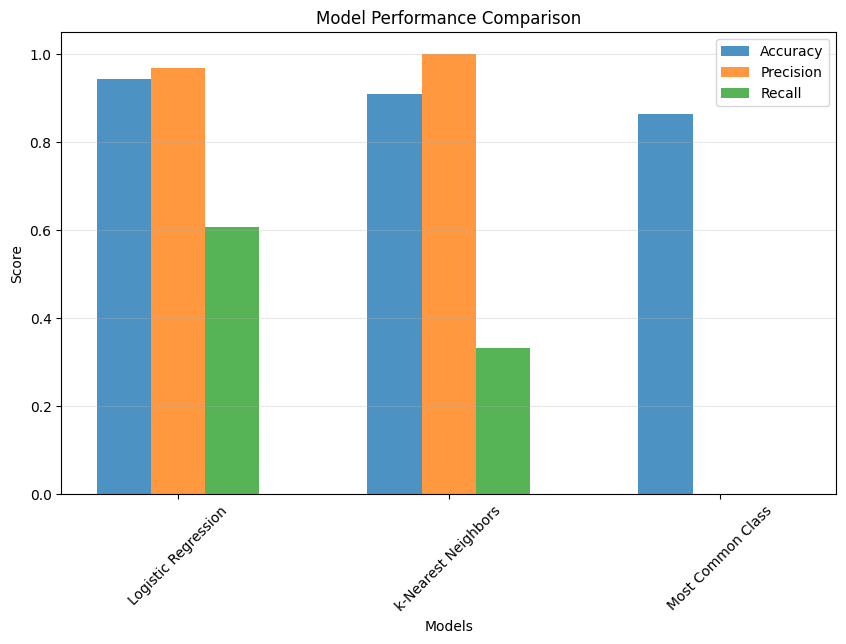

✅ All graphs completed!


In [29]:
plt.figure(figsize=(10, 6))

# All metrics in one chart
models = df_results['Model']
x = range(len(models))
width = 0.2

plt.bar([i-width for i in x], df_results['Accuracy'], width, label='Accuracy', alpha=0.8)
plt.bar([i for i in x], df_results['Precision'], width, label='Precision', alpha=0.8)
plt.bar([i+width for i in x], df_results['Recall'], width, label='Recall', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

print("✅ All graphs completed!")

**What baseline algorithm will you compare to?**

For comparison, I will use the following baseline algorithms:

k-Nearest Neighbors (k-NN): A simple and commonly used machine learning algorithm that classifies based on the closest neighbors. It serves as a realistic baseline to evaluate the performance of the main model.

Most Common Class Predictor: A naive baseline for classification tasks that always predicts the most frequent class in the training data. This provides a minimum performance benchmark to ensure the model learns meaningful patterns.

For regression problems (not in this project), a common baseline is to predict the average output value.

Using these baselines helps to demonstrate that the chosen model performs better than simple or naive approaches.